# Homework 2 Singular Value Decomposition and PCA - Ishan Dane
# Github: https://github.com/idane2309

In [22]:
import numpy as np
from scipy.io import loadmat
from numpy import linalg as LA
import matplotlib.pyplot as plt
results=loadmat('yalefaces.mat')
X=results['X']

## (a) Compute a 100 × 100 correlation matrix C where you will compute the dot product (correlation) between the first 100 images in the matrix X. Thus each element is given by cjk = xTj xk where xj is the jth column of the matrix. Plot the correlation matrix using pcolor.

(1024, 100)
(100, 100)


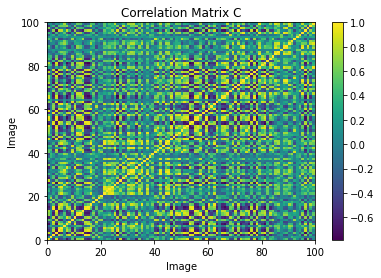

In [23]:
X_corr = X[:,:100]
print(X_corr.shape)

# Correlation Matrix
C = np.corrcoef(X_corr, rowvar = False)  # Set rowvar to true so that columns = observations instead of rows
print(C.shape) # Ensure shape of C matrix is 100 x 100
# Plot the correlation matrix
plt.pcolor(C)
plt.title("Correlation Matrix C")
plt.xlabel("Image")
plt.ylabel("Image")
plt.colorbar()
plt.show()

## (b) From the correlation matrix for part (a), which two images are most highly correlated? Which are most uncorrelated? Plot these faces.

The two images that are most correlated are Images: (5, 62)
The two images that are least correlated are Images: (36, 5)


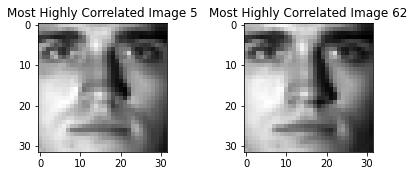

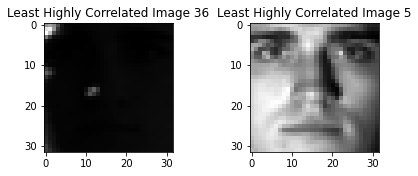

In [24]:
# Find max value of matrix and its 2D index returned as a tuple

# Fill Diagonal with -5 to not interfere with max/min correlations
np.fill_diagonal(C, -5)
maxCorr = np.unravel_index(C.argmax(), C.shape)
minCorr = np.unravel_index(np.abs(C).argmin(), C.shape)
print("The two images that are most correlated are Images: " + str(maxCorr))
print("The two images that are least correlated are Images: " + str(minCorr))

reshaped_max1 = X[:,maxCorr[0]].reshape(32, 32)
# Plot the most highly correlated images
plt.subplot(1,2,1)
plt.imshow(reshaped_max1, cmap='gray')
plt.title('Most Highly Correlated Image ' + str(maxCorr[0]))
reshaped_max2 = X[:, maxCorr[1]].reshape(32, 32)
plt.subplot(1,2,2)
plt.imshow(reshaped_max2, cmap='gray')
plt.title('Most Highly Correlated Image ' + str(maxCorr[1]))

plt.subplots_adjust(wspace=0.6) # Adjust the horizontal spacing between subplots
plt.show()

reshaped_min1 = X[:,minCorr[0]].reshape(32, 32)
# Plot the most highly correlated images
plt.subplot(1,2,1)
plt.imshow(reshaped_min1, cmap='gray')
plt.title('Least Highly Correlated Image ' + str(minCorr[0]))
reshaped_min2 = X[:, minCorr[1]].reshape(32, 32)
plt.subplot(1,2,2)
plt.imshow(reshaped_min2, cmap='gray')
plt.title('Least Highly Correlated Image ' + str(minCorr[1]))

plt.subplots_adjust(wspace=0.6) # Adjust the horizontal spacing between subplots
plt.show()


## (c) Repeat part (a) but now compute the 10 × 10 correlation matrix between images and plot thecorrelation matrix between them: [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005].

(10, 10)


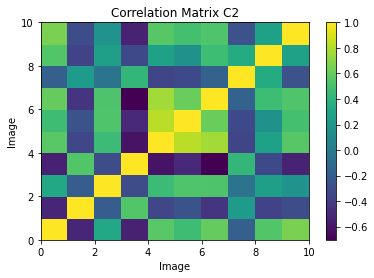

In [25]:
# Extract all Images provided and create new matrix X2 with them
images = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005]
images = [image - 1 for image in images]
X2 = X[:, images]


# Create correlation matrix C2 with given images
C2 = np.corrcoef(X2, rowvar= False) # Use columns as Observations (Each collumn is an image)
print(C2.shape) # Ensure correct shape of C2

# Plot the correlation matrix
plt.pcolor(C2)
plt.title("Correlation Matrix C2")
plt.xlabel("Image")
plt.ylabel("Image")
plt.colorbar()
plt.show()

## (d) Create the matrix Y = XXT and find the first six eigenvectors with the largest magnitude eigenvalue

In [26]:
Y = np.dot(X, X.T)

# Top six largest magnitude eigenvalues
eigenvalues, eigenvectors = LA.eig(Y)


# Top six vectors

# Sort eigenvalues in descending order
index = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[index]

# Sort eigenvectors by their corresponding eigenvalues
eigenvectors_sorted = eigenvectors[:, index]

top_six = eigenvectors_sorted[:,:6]
print("EigenVector 1: " + str(top_six[:, 0]) + " With EigenValue: " + str(eigenvalues[0]))
print("EigenVector 2: " + str(top_six[:, 1]) + " With EigenValue: " + str(eigenvalues[1]))
print("EigenVector 3: " + str(top_six[:, 2]) + " With EigenValue: " + str(eigenvalues[2]))
print("EigenVector 4: " + str(top_six[:, 3]) + " With EigenValue: " + str(eigenvalues[3]))
print("EigenVector 5: " + str(top_six[:, 4]) + " With EigenValue: " + str(eigenvalues[4]))
print("EigenVector 6: " + str(top_six[:, 5]) + " With EigenValue: " + str(eigenvalues[5]))





EigenVector 1: [0.02384327 0.02576146 0.02728448 ... 0.02082937 0.0193902  0.0166019 ] With EigenValue: 234020.4548538858
EigenVector 2: [ 0.04535378  0.04567536  0.04474528 ... -0.03737158 -0.03557383
 -0.02965746] With EigenValue: 49038.31530059217
EigenVector 3: [0.05653196 0.04709124 0.0362807  ... 0.06455006 0.06196898 0.05241684] With EigenValue: 8236.539897013152
EigenVector 4: [ 0.04441826  0.05057969  0.05522219 ... -0.01006919 -0.00355905
  0.00040934] With EigenValue: 6024.871457930162
EigenVector 5: [-0.03378603 -0.01791442 -0.00462854 ...  0.06172201  0.05796353
  0.05757412] With EigenValue: 2051.4964326910545
EigenVector 6: [0.02207542 0.03378819 0.04487476 ... 0.03025485 0.02850199 0.00941028] With EigenValue: 1901.079114823662


## (e) SVD the matrix X and find the first six principal component directions.

In [27]:
U, S, V = LA.svd(X)
print("Principal Component Direction 1: " + str(U[:, 0]))
print("Principal Component Direction 2: " + str(U[:, 1]))
print("Principal Component Direction 3: " + str(U[:, 2]))
print("Principal Component Direction 4: " + str(U[:, 3]))
print("Principal Component Direction 5: " + str(U[:, 4]))
print("Principal Component Direction 6: " + str(U[:, 5]))

Principal Component Direction 1: [-0.02384327 -0.02576146 -0.02728448 ... -0.02082937 -0.0193902
 -0.0166019 ]
Principal Component Direction 2: [ 0.04535378  0.04567536  0.04474528 ... -0.03737158 -0.03557383
 -0.02965746]
Principal Component Direction 3: [0.05653196 0.04709124 0.0362807  ... 0.06455006 0.06196898 0.05241684]
Principal Component Direction 4: [-0.04441826 -0.05057969 -0.05522219 ...  0.01006919  0.00355905
 -0.00040934]
Principal Component Direction 5: [ 0.03378603  0.01791442  0.00462854 ... -0.06172201 -0.05796353
 -0.05757412]
Principal Component Direction 6: [-0.02207542 -0.03378819 -0.04487476 ... -0.03025485 -0.02850199
 -0.00941028]


## (f) Compare the first eigenvector v1 from (d) with the first SVD mode u1 from (e) and compute the norm of difference of their absolute values.

In [28]:
v1 = top_six[:, 0]
u1 = U[:, 0]
norm_difference = LA.norm(np.abs(v1) - np.abs(u1))
print('The norm of the difference of the absolute values of the first eigenvector and the first SVD mode is: ', norm_difference)

The norm of the difference of the absolute values of the first eigenvector and the first SVD mode is:  6.087445984638146e-16


## (g) Compute the percentage of variance captured by each of the first 6 SVD modes. Plot the first 6 SVD modes


The percentage of variance captured by each of the first 6 SVD modes is:  [0.00947502 0.04375777 0.09702215 0.12990517 0.1489301  0.15705217]


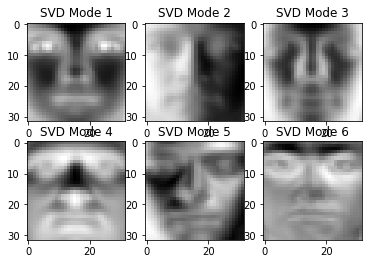

In [29]:
first_six = U[:, :6]
varCapt = np.cumsum(first_six**2)/np.sum(first_six**2)
print('The percentage of variance captured by each of the first 6 SVD modes is: ', varCapt[0:6] * 100)

# Plot first 6 SVD modes
# Plot the first 6 SVD modes
plt.subplot(2,3,1)
plt.imshow(U[:,0].reshape(32,32), cmap='gray')
plt.title('SVD Mode 1')
plt.subplot(2,3,2)
plt.imshow(U[:,1].reshape(32,32), cmap='gray')
plt.title('SVD Mode 2')
plt.subplot(2,3,3)
plt.imshow(U[:,2].reshape(32,32), cmap='gray')
plt.title('SVD Mode 3')
plt.subplot(2,3,4)
plt.imshow(U[:,3].reshape(32,32), cmap='gray')
plt.title('SVD Mode 4')
plt.subplot(2,3,5)
plt.imshow(U[:,4].reshape(32,32), cmap='gray')
plt.title('SVD Mode 5')
plt.subplot(2,3,6)
plt.imshow(U[:,5].reshape(32,32), cmap='gray')
plt.title('SVD Mode 6')
plt.show()